#### 캘리포니아 데이터 가져오기

In [51]:
import pandas as pd
print('pandas 버전 : ', pd.__version__)

pandas 버전 :  2.0.0


In [36]:
train = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
test = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_test.csv", sep=",")
train.shape, test.shape

((17000, 9), (3000, 9))

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [38]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


- longitude : 경도
- latitude : 위도
- housing_median_age : 주택 평균 연령
- total_rooms : 총 방 갯수
- total_bedrooms : 총 침실 갯수
- population : 인구
- households : 가구수
- median_income : 중간 소득
- median_house_value : 중간 주택 가격


In [39]:
# [기본실습 1]각 열의 평균 값을 구해보기
train.mean() # axis=0

longitude               -119.562108
latitude                  35.625225
housing_median_age        28.589353
total_rooms             2643.664412
total_bedrooms           539.410824
population              1429.573941
households               501.221941
median_income              3.883578
median_house_value    207300.912353
dtype: float64

In [40]:
# [기본실습 2]각 행의 평균 값을 구해보기
train.mean(axis=1)

0         8357.597067
1        10131.527778
2         9664.642322
3         8435.029078
4         7567.436111
             ...     
16995    12806.408567
16996     9276.770878
16997    12049.507922
16998    10082.053300
16999    10863.022744
Length: 17000, dtype: float64

In [41]:
# [기본실습 3] 각 열의 최대값은 얼마인가요?
train.max()

longitude               -114.3100
latitude                  41.9500
housing_median_age        52.0000
total_rooms            37937.0000
total_bedrooms          6445.0000
population             35682.0000
households              6082.0000
median_income             15.0001
median_house_value    500001.0000
dtype: float64

In [42]:
# [기본실습 3] 각 열의 최소값은 얼마인가요?
train.min()

longitude              -124.3500
latitude                 32.5400
housing_median_age        1.0000
total_rooms               2.0000
total_bedrooms            1.0000
population                3.0000
households                1.0000
median_income             0.4999
median_house_value    14999.0000
dtype: float64

     ---------------------------------------- 7.6/7.6 MB 11.9 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 KB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 21.3 MB/s eta 0:00:00
     ---------------------------------------- 163.0/163.0 KB ? eta 0:00:00


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


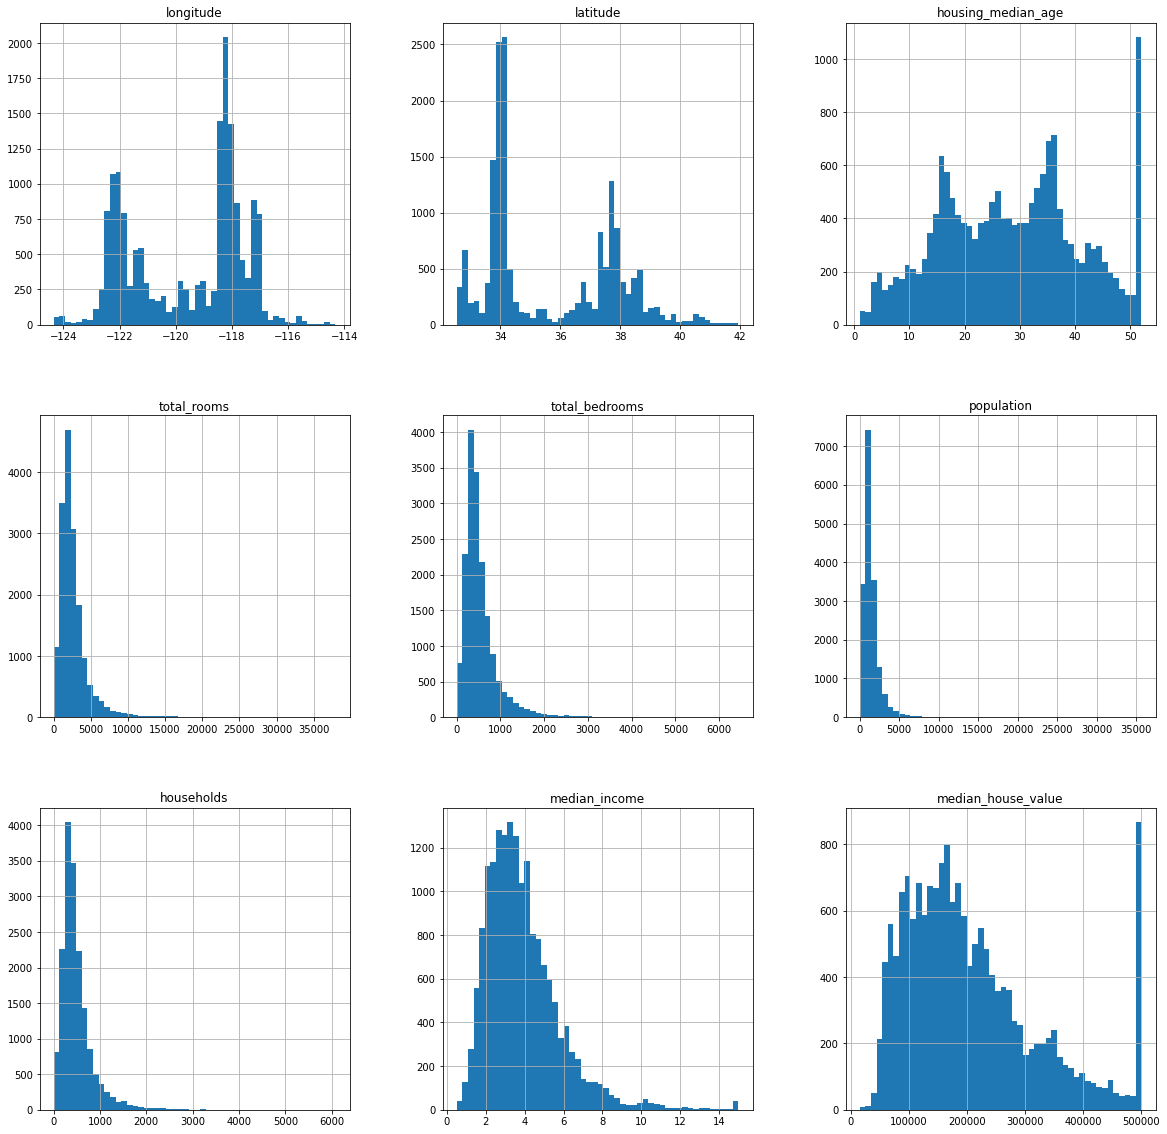

In [17]:

import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,20))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

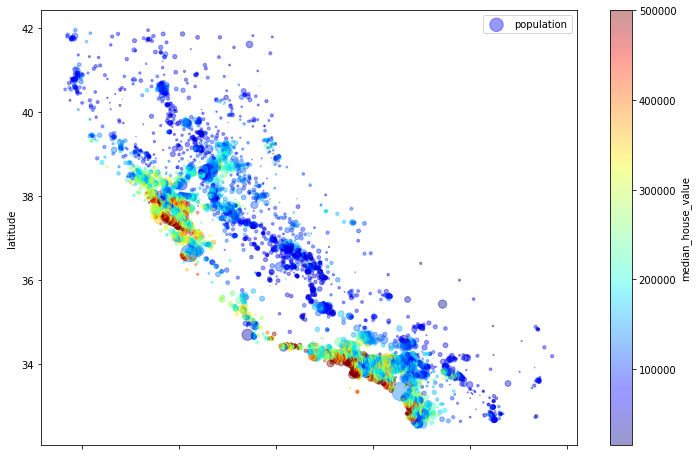

In [18]:
### 위도 경도에 따른 산점도 분포
train.plot(kind="scatter", 
           x="longitude", y="latitude", 
           alpha=0.4, s=train["population"]/100, 
           label="population", c="median_house_value", 
           figsize=(12,8),
           cmap=plt.get_cmap("jet"), colorbar=True)

In [43]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [44]:
train['total_rooms'].describe()

count    17000.000000
mean      2643.664412
std       2179.947071
min          2.000000
25%       1462.000000
50%       2127.000000
75%       3151.250000
max      37937.000000
Name: total_rooms, dtype: float64

In [45]:
# 전체 방의 수를 위의 값을 기준으로 네 그룹으로 나눈다
tmpA1 = train.loc[train['total_rooms'] > 3151, :] # 75% 이상
tmpA2 = train.loc[ (train['total_rooms']> 2127) & (train['total_rooms'] <= 3151)  , :] # 50%~75%
tmpA3 = train.loc[ (train['total_rooms']> 1462) & (train['total_rooms'] <= 2127)   , :] # 25% ~ 50%
tmpA4 = train.loc[ train['total_rooms'] <= 1462  , :] # 25% 이하

tmpA1.shape, tmpA2.shape, tmpA3.shape, tmpA4.shape

((4250, 9), (4247, 9), (4249, 9), (4254, 9))

In [46]:
# room_level - group번호
train.loc[ train['total_rooms']> 3151 , "room_level" ] = 1
train.loc[ (train['total_rooms']> 2127) & (train['total_rooms'] <= 3151) , "room_level" ] = 2
train.loc[ (train['total_rooms']> 1462) & (train['total_rooms'] <= 2127) , "room_level" ] = 3
train.loc[ (train['total_rooms'] <= 1462) , "room_level" ] = 4

train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_level
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,1.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,4.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,4.0


In [47]:
train['room_level'] = train['room_level'].astype('int32')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
 9   room_level          17000 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.2 MB


<Axes: xlabel='room_level', ylabel='count'>

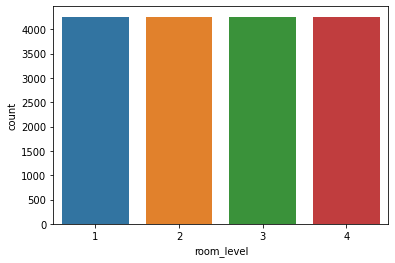

In [49]:
# [추가실습 1] grp_pop-내용을 시각화 시켜보기
import seaborn as sns

sns.countplot(x='room_level', data=train)

In [55]:
train['population'].describe()

count    17000.000000
mean      1429.573941
std       1147.852959
min          3.000000
25%        790.000000
50%       1167.000000
75%       1721.000000
max      35682.000000
Name: population, dtype: float64

In [61]:
train['population'].max()

35682.0

In [53]:
# [추가실습 1] population의 값의 group화 시켜보자. 5그룹으로 나눠서 새로운 컬럼을 만들어보기(1~5)
train['grp_pop'] = pd.qcut(train['population'], q=5, labels=[1, 2, 3, 4, 5])
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_level,population_group,grp_pop
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1,3,3
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,1,3,3
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,4,1,1
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3,1,1
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,4,1,1


In [65]:
# [추가실습 1] population의 값의 group화 시켜보자. 5그룹으로 나눠서 새로운 컬럼을 만들어보기(1~5)
# train['population'].describe() 값 중 아무렇게 나눔
train.loc[ train['population']>= 1721 , "grp_pop" ] = 1
train.loc[ (train['population']> 1721) & (train['population'] <= 1167) , "grp_pop" ] = 2
train.loc[ (train['population']> 1167) & (train['population'] <= 790) , "grp_pop" ] = 3
train.loc[ (train['population']> 790) & (train['population'] <= 500) , "grp_pop" ] = 4
train.loc[ (train['population'] <= 500) , "grp_pop" ] = 5

In [66]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_level,population_group,grp_pop
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1,3,5
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,1,3,5
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,4,1,5
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3,1,5
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,4,1,5


<Axes: xlabel='grp_pop', ylabel='count'>

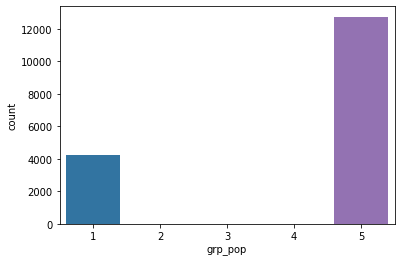

In [67]:
# [추가실습 3] grp_pop-내용을 시각화 시켜보기 (barplot)
sns.countplot(x='grp_pop', data=train)